In [1]:
# library imports
import json
import numpy as np
import trackpy as tp
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
# Load data from json files into pandas array
def loadData(directory):
  array = np.empty([0,3])
  files = sorted(glob.glob(directory), reverse = True)
  files = sorted(glob.glob(directory))
  
  for j in range(0,len(files)):
    with open(files[j], 'r') as read_file:
      data = json.load(read_file)
      for i in range(0,len(data)):
        x = (data[i]['bottomright']['x'] + data[i]['topleft']['x'])/2
        y = (data[i]['bottomright']['y'] + data[i]['topleft']['y'])/2
        array = np.vstack([array,[j,x,y]])

  array = array.astype(int)
  dataset = pd.DataFrame({'frame':array[:,0],'x':array[:,1],'y':array[:,2]})
  return dataset

In [5]:
# Import all data into DataFrame
dataset = loadData('/home/stian/Desktop/testVid/highC-r1/corrected/outIMG/*.json') 
print(dataset.head())

   frame    x   y
0      0  355  11
1      0  339  34
2      0  351  37
3      0  456  32
4      0  546  33


Frame 994: 1 trajectories present.
Before: 256
After: 47


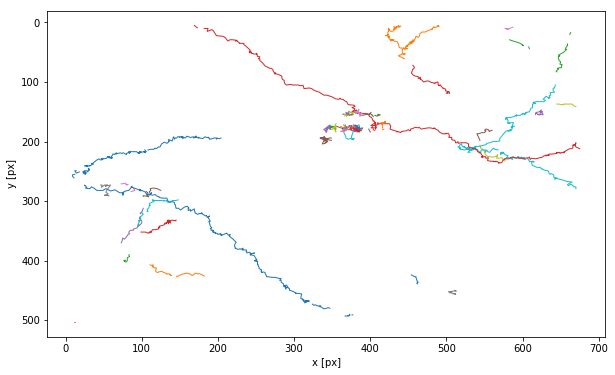

/home/stian/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FileNotFoundError: [Errno 2] No such file or directory: '/home/stian/Desktop/testVid/highC-r1/corrected/2019-06-28_r1_5000.tif'

In [6]:
# Filter and Display data
t = tp.link_df(dataset, 15, memory = 7) 
t1 = tp.filter_stubs(t,8)
#t1 = t1.loc[t1['particle'] <= 100]
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())
plt.figure(figsize=(10,6))
tp.plot_traj(t1)
plt.show()


for i in range(0,1006):
    basename = '/home/stian/Desktop/testVid/highC-r1/corrected/'
    imname = basename + '2019-06-28_r1_' + str(10 + i*5).zfill(4) + '.tif'
    plt.figure(figsize = (10,8))
    plt.imshow(plt.imread(imname),cmap='gray')
    tmp = t1[t1.frame == i]
    for _, row in tmp.iterrows():
        particle = t1[t1.particle == row.particle]
        plt.plot(row.x,row.y,'ro')
        plt.plot(particle.x,particle.y,'b-')
    plt.savefig('/home/stian/Desktop/testVid/tmp/' + 'forLongBigLL-2019-06-28_r1_' + str(10 + i*5).zfill(4) + '.tif')
    plt.clf()
    
    

Frame 295: 19 trajectories present.
Before: 393
After: 169


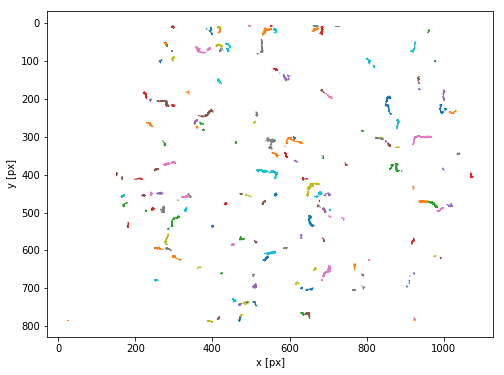

In [12]:
# Link the data together and filter
t = tp.link_df(dataset, 10, memory = 5) 
t1 = tp.filter_stubs(t,10)
#t1 = t1.loc[t1['particle'] <= 100]
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())
plt.figure(figsize=(8,6))
tp.plot_traj(t1)

Frame 100: 31 trajectories present.
Before: 319
After: 68


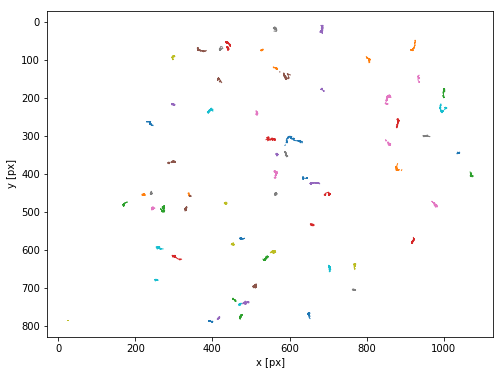

In [6]:
# Link the data together and filter
t = tp.link_df(dataset.loc[dataset['frame'] <= 100], 10, memory=5) 
t1 = tp.filter_stubs(t,30)
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())
plt.figure(figsize=(8,6))
tp.plot_traj(t1)